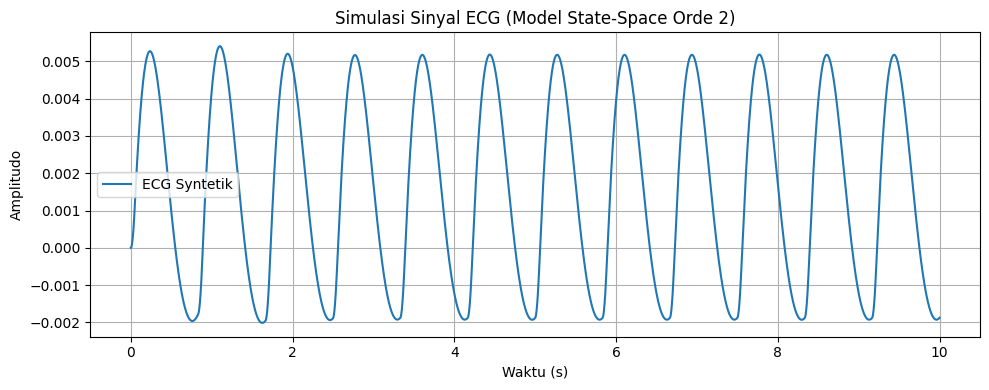

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import StateSpace, lsim

# Parameter sistem osilasi teredam untuk model ECG
f = 1.0            # frekuensi detak jantung (Hz)
w = 2 * np.pi * f  # frekuensi sudut
zeta = 0.3         # rasio redaman

# Matriks model state-space orde 2
A = [[0, 1],
     [-w**2, -2*zeta*w]]
B = [[0],
     [1]]
C = [[1, 0]]
D = [[0]]

# Buat sistem state-space
system = StateSpace(A, B, C, D)

# Waktu simulasi
t = np.linspace(0, 10, 10000)  # 10 detik, sampling 0.001 s

# Buat input berupa pulsa periodik (simulasi detak jantung)
def heartbeat_signal(t, freq=1.0, width=0.05):
    signal = np.zeros_like(t)
    period = 1.0 / freq
    for i in range(len(t)):
        if (t[i] % period) < width:
            signal[i] = 1.0
    return signal

u = heartbeat_signal(t, freq=1.2, width=0.05)  # 72 bpm

# Simulasikan respons sistem terhadap input u
tout, y, x = lsim(system, U=u, T=t)

# Plot sinyal ECG hasil simulasi
plt.figure(figsize=(10, 4))
plt.plot(tout, y, label='ECG Syntetik')
plt.title('Simulasi Sinyal ECG (Model State-Space Orde 2)')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


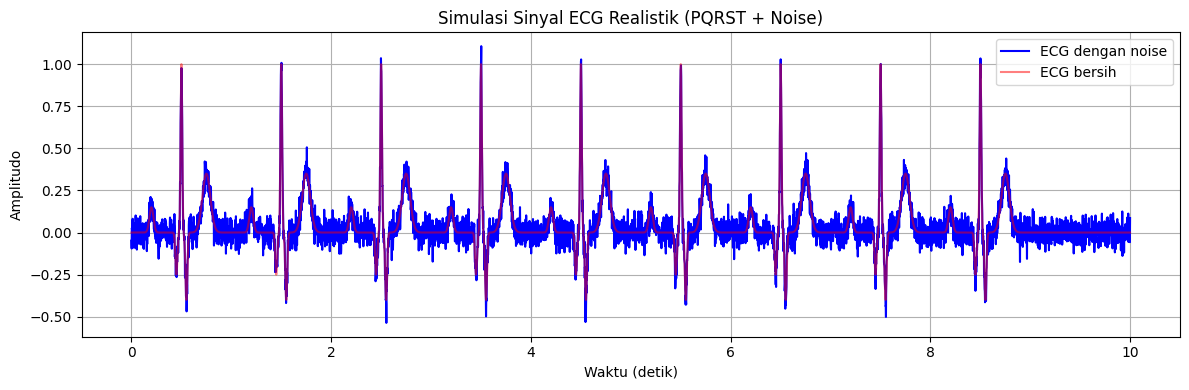

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# Parameter waktu
fs = 500  # Hz
t = np.linspace(0, 10, fs*10)  # 10 detik

# Fungsi pembentuk gelombang ECG sintetis (P, QRS, T)
def ecg_waveform(t, bpm=72):
    ecg = np.zeros_like(t)
    beat_interval = 60 / bpm  # dalam detik
    samples_per_beat = int(beat_interval * fs)
    
    for i in range(0, len(t), samples_per_beat):
        if i + samples_per_beat >= len(t):
            break
        beat = np.zeros(samples_per_beat)
        # P wave
        p_pos = int(0.2 * samples_per_beat)
        beat += np.exp(-0.5 * ((np.arange(samples_per_beat) - p_pos) / (0.02 * fs))**2) * 0.15
        # Q wave
        q_pos = int(0.45 * samples_per_beat)
        beat -= np.exp(-0.5 * ((np.arange(samples_per_beat) - q_pos) / (0.01 * fs))**2) * 0.25
        # R wave
        r_pos = int(0.5 * samples_per_beat)
        beat += np.exp(-0.5 * ((np.arange(samples_per_beat) - r_pos) / (0.008 * fs))**2) * 1.0
        # S wave
        s_pos = int(0.55 * samples_per_beat)
        beat -= np.exp(-0.5 * ((np.arange(samples_per_beat) - s_pos) / (0.01 * fs))**2) * 0.4
        # T wave
        t_pos = int(0.75 * samples_per_beat)
        beat += np.exp(-0.5 * ((np.arange(samples_per_beat) - t_pos) / (0.04 * fs))**2) * 0.35
        ecg[i:i+samples_per_beat] += beat
    
    return ecg

# Buat sinyal ECG sintetis
ecg_clean = ecg_waveform(t, bpm=60)

# Tambahkan noise Gaussian (white noise)
noise = 0.05 * np.random.randn(len(t))
ecg_noisy = ecg_clean + noise

# Visualisasi
plt.figure(figsize=(12, 4))
plt.plot(t, ecg_noisy, label='ECG dengan noise', color='blue')
plt.plot(t, ecg_clean, label='ECG bersih', color='red', alpha=0.5)
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.title('Simulasi Sinyal ECG Realistik (PQRST + Noise)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


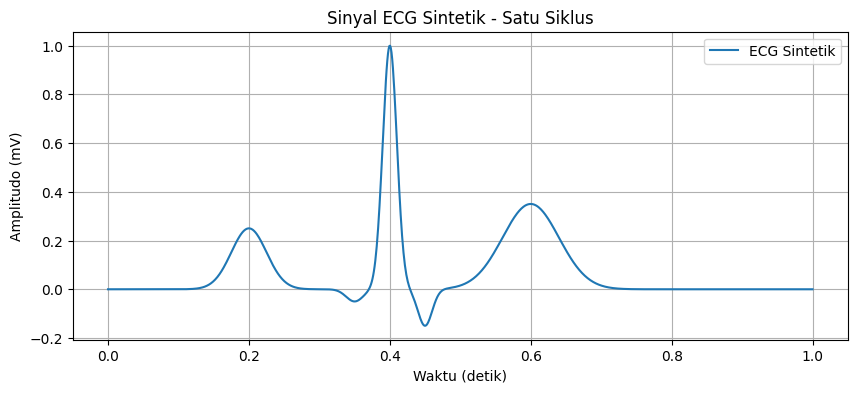

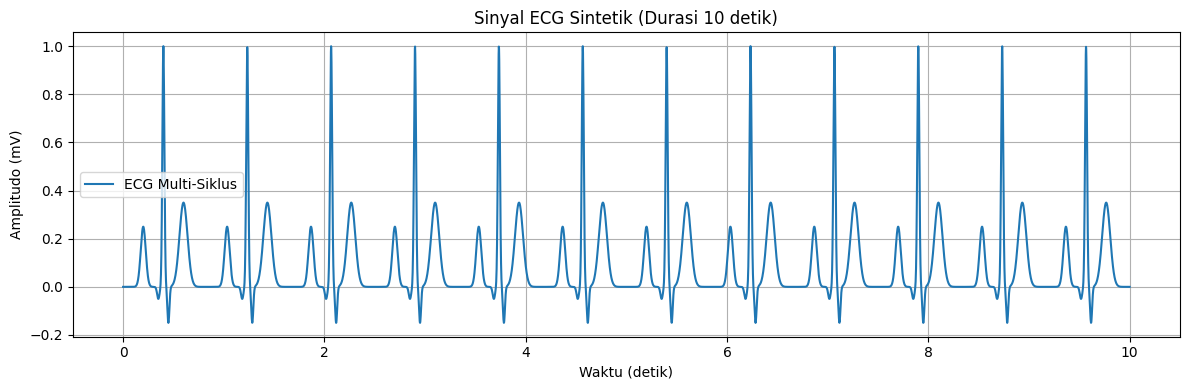

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(t, A, mu, sigma):
    return A * np.exp(-((t - mu) ** 2) / (2 * sigma ** 2))

def ECG_sintetik(t):
    # Parameter dari gelombang P, Q, R, S, T (amplitudo, posisi tengah, dan lebar)
    P = gaussian(t, 0.25, 0.2, 0.025)
    Q = gaussian(t, -0.05, 0.35, 0.012)
    R = gaussian(t, 1.0, 0.4, 0.01)
    S = gaussian(t, -0.15, 0.45, 0.01)
    T = gaussian(t, 0.35, 0.6, 0.04)

    return P + Q + R + S + T

# Rentang waktu simulasi: satu siklus jantung (0 s – 1 s)
t = np.linspace(0, 1, 1000)
ecg = ECG_sintetik(t)

plt.figure(figsize=(10, 4))
plt.plot(t, ecg, label='ECG Sintetik')
plt.title('Sinyal ECG Sintetik - Satu Siklus')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo (mV)')
plt.grid(True)
plt.legend()
plt.show()

fs = 500  # Sampling rate
duration = 10  # dalam detik
t = np.linspace(0, duration, duration * fs)
bpm = 72
beat_interval = 60 / bpm

# Susun sinyal dengan menggeser ECG_sintetik per beat
ecg_full = np.zeros_like(t)
for i in range(int(duration / beat_interval)):
    t_shifted = t - i * beat_interval
    ecg_full += ECG_sintetik(t_shifted)

plt.figure(figsize=(12, 4))
plt.plot(t, ecg_full, label='ECG Multi-Siklus')
plt.title('Sinyal ECG Sintetik (Durasi 10 detik)')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo (mV)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
